# Visualize

In [2]:
import pandas as pd

full_raw = pd.read_csv('Rankings/WeAreTheChampionsFull.csv')
full_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 6 columns):
SeedRegion                 68 non-null int64
School                     68 non-null object
Conference                 68 non-null object
SeedOverall                68 non-null int64
Region                     68 non-null object
Score_WeAreTheChampions    68 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.3+ KB


In [3]:
full_raw.head()

,SeedRegion,School,Conference,SeedOverall,Region,Score_WeAreTheChampions
0,15,Abilene Christian,Southland,62,Midwest,0.379207
1,11,Arizona State,Pac-12,45,West,0.374984
2,5,Auburn,SEC,18,Midwest,0.445772
3,9,Baylor,Big 12,35,West,0.386908
4,11,Belmont,Ohio Valley,42,East,0.408165


In [159]:
color_map = {
    'East': 'xkcd:blue',
    'West' : 'xkcd:red',
    'Midwest' : 'xkcd:yellow',
    'South' : 'xkcd:green'
}
full = full_raw.assign(RegionColor=lambda x: x.Region.map(color_map))
full.loc[full.School == "Fairleigh Dickinson", 'SeedRegion'] = 15.5
full.loc[full.School == "Belmont", 'SeedRegion'] = 10.5

In [20]:
full.head()

,SeedRegion,School,Conference,SeedOverall,Region,Score_WeAreTheChampions,RegionColor
0,15,Abilene Christian,Southland,62,Midwest,0.379207,y
1,11,Arizona State,Pac-12,45,West,0.374984,r
2,5,Auburn,SEC,18,Midwest,0.445772,y
3,9,Baylor,Big 12,35,West,0.386908,r
4,11,Belmont,Ohio Valley,42,East,0.408165,b


In [5]:
import matplotlib.pyplot as plt
import numpy as np

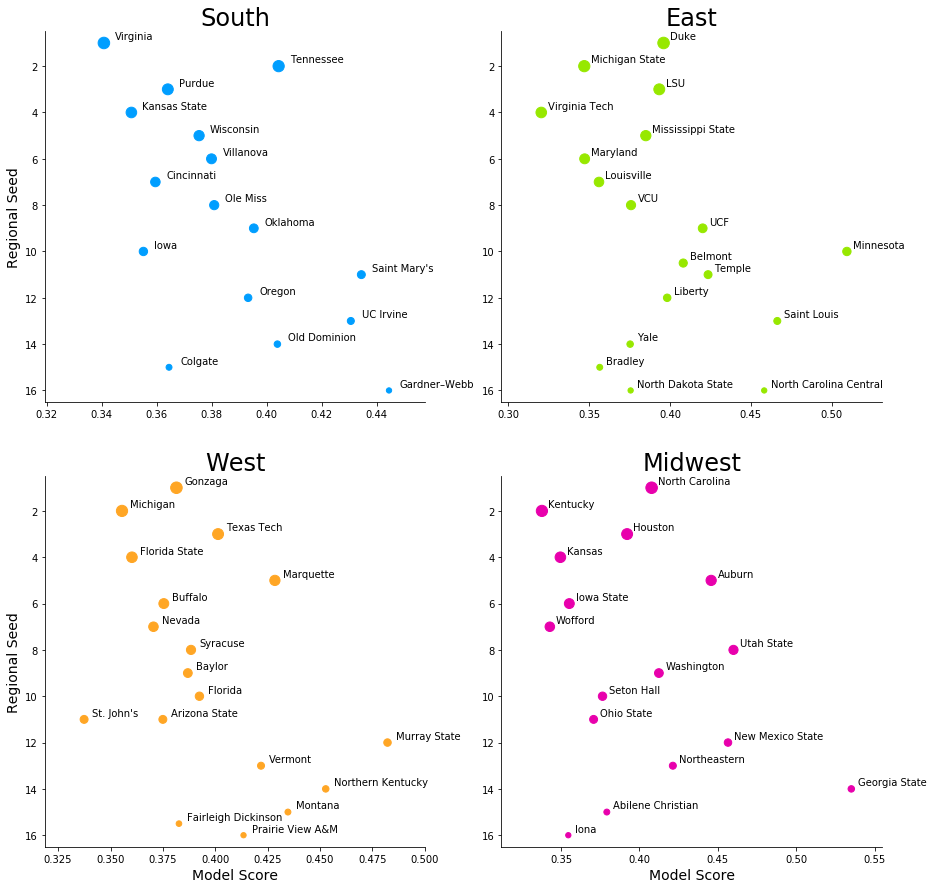

In [167]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
regions = ['South', 'East', 'West', 'Midwest']
colors = ['#009EFF', '#97E800', '#FFA625', '#E800AC']

for i, (ax, region, color) in enumerate(zip(np.ravel(axes), regions, colors)):
    d = full.query(f'Region=="{region}"')
    ax.scatter(d.Score_WeAreTheChampions, d.SeedRegion, c=color, s=(20 - d.SeedRegion) * 7)
    ax.set_title(region, fontsize=24)
    if i in [2, 3]:
        ax.set_xlabel('Model Score', fontsize=14)
    if i in [0, 2]:
        ax.set_ylabel('Regional Seed', fontsize=14)
    ax.set_ylim(16.5, .5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    for row in d.itertuples():
        ax.annotate(row.School, (row.Score_WeAreTheChampions + .004, row.SeedRegion - .15))

plt.savefig('./Images/Regions.png', dpi=200)
plt.savefig('./Images/Regions.svg', dpi=200)


## tSNE

In [70]:
import pickle

with open("./press_averages.pkl", 'rb') as i:
    pa = pickle.load(i)
    
with open("./names.pkl", 'rb') as i:
    names = pickle.load(i)
    
names, pa = list(zip(*sorted(list(zip(names, pa)), key=lambda x: x[0])))

In [71]:
with open('press_averages_alphabetical.pkl', 'wb') as out:
    pickle.dump(pa, out)

In [86]:
with open('press_averages_alphabetical.pkl', 'rb') as i:
    press_averages_raw = pickle.load(i)
press_averages = np.concatenate([np.expand_dims(avg, 0) for avg in press_averages_raw], axis=0)

In [47]:
from sklearn.manifold import TSNE

In [87]:
tsne = TSNE(2)
reduced = tsne.fit_transform(np.array(list(press_averages)))

In [91]:
full_raw = full_raw.assign(tsne_x=reduced[:,0], tsne_y=reduced[:,1])
full_raw.head()

,SeedRegion,School,Conference,SeedOverall,Region,Score_WeAreTheChampions,tsne_x,tsne_y
0,15,Abilene Christian,Southland,62,Midwest,0.379207,-0.608471,-2.584924
1,11,Arizona State,Pac-12,45,West,0.374984,-2.915919,-4.990505
2,5,Auburn,SEC,18,Midwest,0.445772,0.786264,-5.739642
3,9,Baylor,Big 12,35,West,0.386908,1.316669,-0.577195
4,11,Belmont,Ohio Valley,42,East,0.408165,-0.463548,-3.920274


In [92]:
full_raw.to_csv('Rankings/WeAreTheChampionsFull.csv', index=False)

In [93]:
full_raw = pd.read_csv('Rankings/WeAreTheChampionsFull.csv')

In [105]:
color_map = {
    'East': 1,
    'West' : 2,
    'Midwest' : 3,
    'South' : 4
}

full = full_raw.assign(RegionColor=lambda x: x.Region.map(color_map))

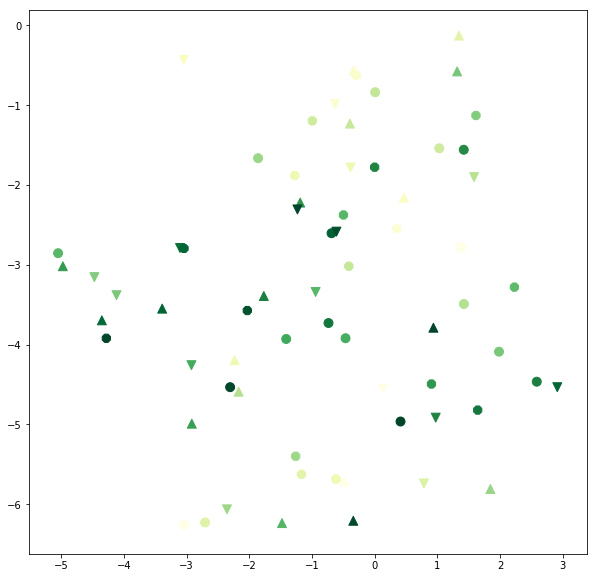

In [102]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10))

axes.scatter(full.query('Region=="West"').tsne_x, full.query('Region=="West"').tsne_y, c=full.query('Region=="West"').SeedOverall, cmap='YlGn', s=80, marker='^')
axes.scatter(full.query('Region=="East"').tsne_x, full.query('Region=="East"').tsne_y, c=full.query('Region=="East"').SeedOverall, cmap='YlGn', s=80, marker='o')
axes.scatter(full.query('Region=="Midwest"').tsne_x, full.query('Region=="Midwest"').tsne_y, c=full.query('Region=="Midwest"').SeedOverall, cmap='YlGn', s=80, marker='v')
axes.scatter(full.query('Region=="South"').tsne_x, full.query('Region=="South"').tsne_y, c=full.query('Region=="South"').SeedOverall, cmap='YlGn', s=80, marker='8')


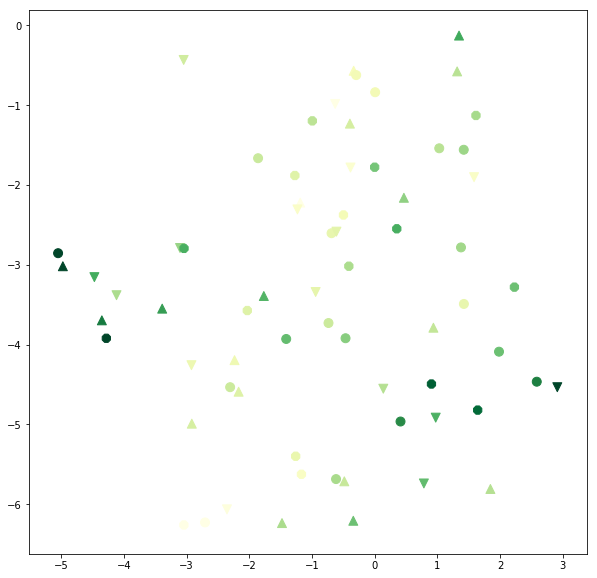

In [103]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10))

axes.scatter(full.query('Region=="West"').tsne_x, full.query('Region=="West"').tsne_y, c=full.query('Region=="West"').Score_WeAreTheChampions, cmap='YlGn', s=80, marker='^')
axes.scatter(full.query('Region=="East"').tsne_x, full.query('Region=="East"').tsne_y, c=full.query('Region=="East"').Score_WeAreTheChampions, cmap='YlGn', s=80, marker='o')
axes.scatter(full.query('Region=="Midwest"').tsne_x, full.query('Region=="Midwest"').tsne_y, c=full.query('Region=="Midwest"').Score_WeAreTheChampions, cmap='YlGn', s=80, marker='v')
axes.scatter(full.query('Region=="South"').tsne_x, full.query('Region=="South"').tsne_y, c=full.query('Region=="South"').Score_WeAreTheChampions, cmap='YlGn', s=80, marker='8')


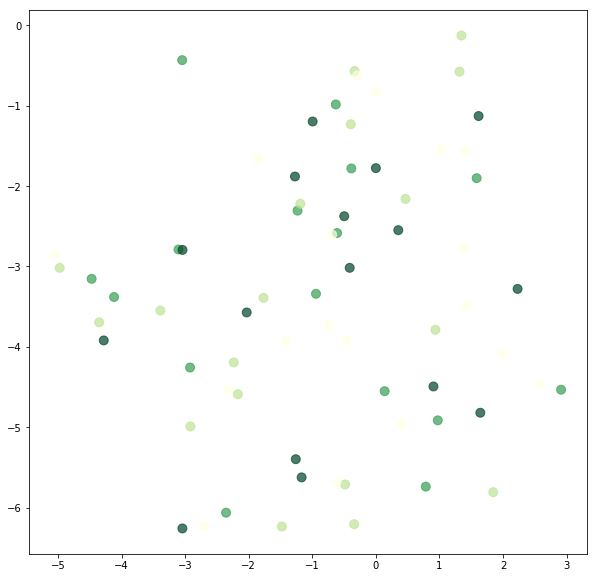

In [110]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10))

axes.scatter(full.tsne_x, full.tsne_y, c=full.RegionColor, cmap='YlGn', s=80, marker='o', alpha=.7)


## Presentation

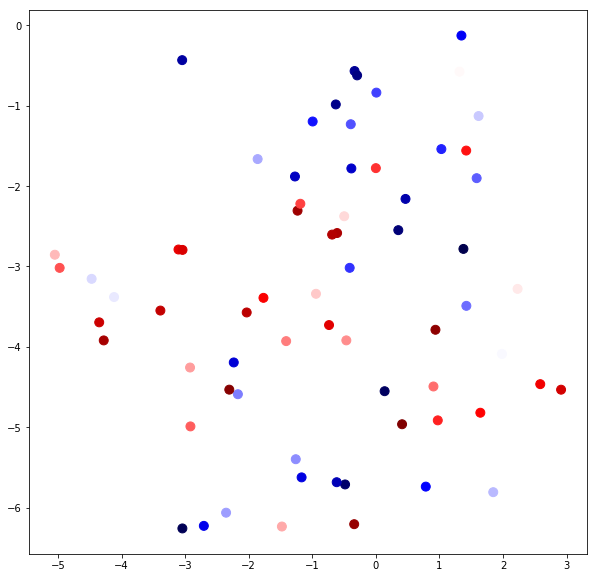

In [171]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10))

axes.scatter(full.tsne_x, full.tsne_y, c=full.SeedOverall, cmap='seismic', s=80)


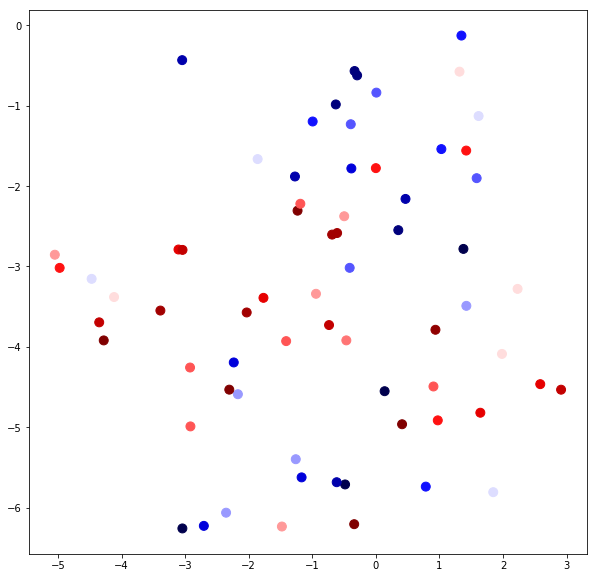

In [173]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10))

axes.scatter(full.tsne_x, full.tsne_y, c=full.SeedRegion, cmap='seismic', s=80)

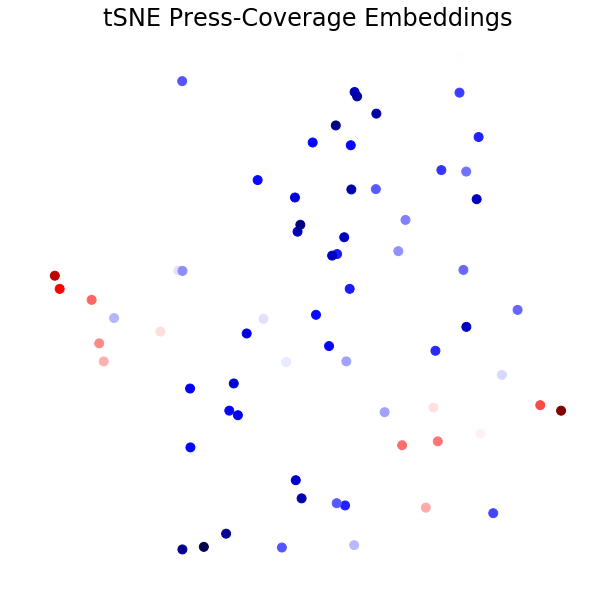

In [190]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10))

axes.scatter(full.tsne_x, full.tsne_y, c=full.Score_WeAreTheChampions, cmap='seismic', s=80)
# axes.spines["top"].set_visible(False)
# axes.spines["right"].set_visible(False)
# axes.spines["bottom"].set_visible(False)
# axes.spines["left"].set_visible(False)
axes.axis('off')
axes.set_title("tSNE Press-Coverage Embeddings", fontsize=24)
plt.savefig('./Images/tSNE.png', dpi=200)
plt.savefig('./Images/tSNE.svg', dpi=200)